In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df=pd.read_csv('BMI.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f742b3a15c0>,
      dtype=object)

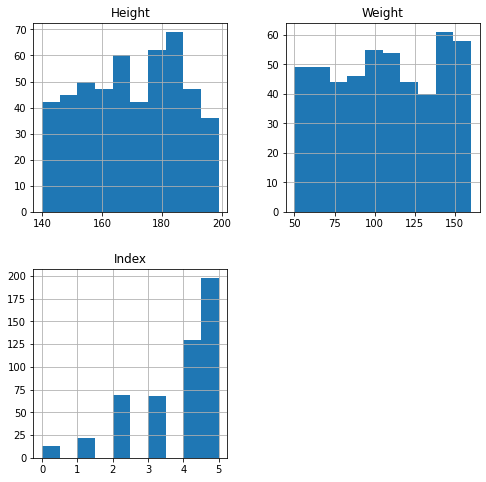

In [ ]:
df.hist(figsize=[8,8])

In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [ ]:
df.Gender[df.Gender == 'Male'] = 1
df.Gender[df.Gender == 'Female'] = 0
print(df)

    Gender  Height  Weight  Index
0        1     174      96      4
1        1     189      87      2
2        0     185     110      4
3        0     195     104      3
4        1     149      61      3
..     ...     ...     ...    ...
495      0     150     153      5
496      0     184     121      4
497      0     141     136      5
498      1     150      95      5
499      1     173     131      5

[500 rows x 4 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
x=df[['Gender','Height','Weight']]
y=df['Index']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x=df[['Gender','Height','Weight']]
y=df['Index']
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
print("Accuracy",accuracy_score(Y_test,knn.predict(X_test)))


Accuracy 0.95


Data Standardization

In [ ]:
X_train_scale=scale(X_train[['Gender','Height','Weight']])
X_test_scale=scale(X_test[['Gender','Height','Weight']])

knn_std=KNeighborsClassifier(n_neighbors=3)
knn_std.fit(X_train_scale,Y_train)
print("Accuracy",accuracy_score(Y_test,knn_std.predict(X_test_scale)))

Accuracy 0.88


In [ ]:
min_max=MinMaxScaler()
# Scaling down both train and test data set
X_train_minmax=min_max.fit_transform(X_train[['Gender','Height','Weight']])
X_test_minmax=min_max.fit_transform(X_test[['Gender','Height','Weight']])
knn_minmax=KNeighborsClassifier(n_neighbors=3)
knn_minmax.fit(X_train_minmax,Y_train)
# Checking the model's accuracy

print("Accuracy",accuracy_score(Y_test,knn_minmax.predict(X_test_minmax)))

Accuracy 0.83


One Hot Encoding

In [ ]:
 enc=OneHotEncoder(sparse=False)
 X_train_1=X_train
 X_test_1=X_test
 columns=['Gender','Height','Weight']
 for col in columns:
       # creating an exhaustive list of all possible categorical values
       data=X_train[[col]].append(X_test[[col]])
       enc.fit(data)
       # Fitting One Hot Encoding on train data
       temp = enc.transform(X_train[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(X_train.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
       X_train_1=pd.concat([X_train_1,temp],axis=1)
       # fitting One Hot Encoding on test data
       temp = enc.transform(X_test[[col]])
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(X_test.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       X_test_1=pd.concat([X_test_1,temp],axis=1)
    

In [ ]:
# Fitting a logistic knn model
knn_hot=KNeighborsClassifier(n_neighbors=3)
knn_hot.fit(X_train_1,Y_train)
# Checking the model's accuracy
print("Accuracy",accuracy_score(Y_test,knn_hot.predict(X_test_1)))

Accuracy 0.84
